# 실무예제 3-1

## 다음은 2013년 전국 주요지점별 유동인구 수 현황의 일부이다. 남자20대 vs. 여자20대, 남자10대 vs. 여자50대의 상관계수를 구하여 비교해 보고, 중복 속성으로 판단할 수 있을지 검토해 보시오.

### 데이터 파일 : ch3-1(유동인구수).csv

### 원본 투플수 : 23,221개

In [3]:
# ch3-1.py
import pandas as pd
import numpy as np

# matplotlib : 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
# pyplot : matlab이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 
#          Matplotlib 의 하위 API를 포장(wrapping)한 명령어 집합을 제공
import matplotlib.pyplot as plt

# 데이터로드 (ch3-1.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('ch3-1(유동인구수).csv', encoding='CP949', engine='python')

In [5]:
rawData.shape

(23221, 15)

In [6]:
rawData.head()

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6


In [9]:
# 상관계수 분석 (남자20대 vs. 여자20대)
corr = np.corrcoef(rawData['남자20대'],rawData['여자20대'])

### np.corrcoef() : 인수로 사용된 두 속성 간의 상관계수를 구하는 numpy 패키지 함수

In [11]:
print("-- 상관계수(남자20대 vs. 여자20대) --")
print(corr)

-- 상관계수(남자20대 vs. 여자20대) --
[[1.         0.84727982]
 [0.84727982 1.        ]]


### 남자20대와 여자20대의 상관계수는 0.84 이상으로 두 속성 사이에는 강한 양의 상관관계가 존재
### -> 남자20대와 여자20대을 중복 속성으로 판단하여 하나의 속성을 분석 대상에서 제외해도 전체적인 분석결과에는 큰 영향을 미치지 않을 것으로 추정할 수 있음

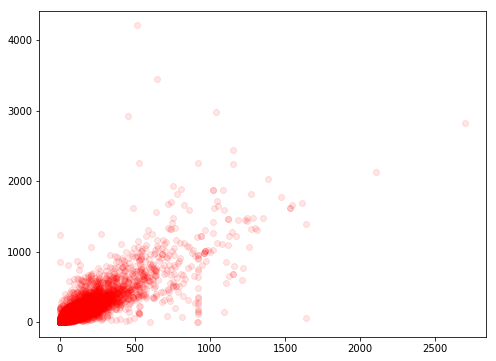

In [17]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))
# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(rawData['남자20대'],rawData['여자20대'],alpha=0.1,color='r')
# 차트 보여주기
plt.show()

### figure() : 차트 환경을 설정하는 matplotlib.pyplot 패키지 함수
### scatter() : 산점도 차트를 그리는 함수
### show() : 차트를 화면에 출력하는 함수

-- 상관계수(남자10대 vs. 여자50대) --
[[1.         0.26322329]
 [0.26322329 1.        ]]


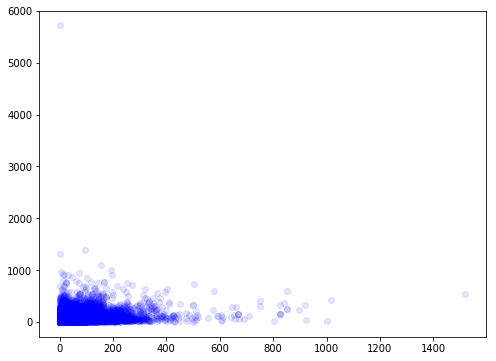

In [20]:
# 상관계수 분석 (남자10대 vs. 여자50대)
corr = np.corrcoef(rawData['남자10대'],rawData['여자50대'])
print("-- 상관계수(남자10대 vs. 여자50대) --")
print(corr) # 상관계수가 거의 없다는 걸 알 수 있다

# 차트 그리기
plt.figure(figsize=(8,6))
plt.scatter(rawData['남자10대'],rawData['여자50대'],alpha=0.1,color='b')
plt.show()

### 남자10대와 여자50대의 상관계수는 0.26 정도로 두 속성 사이의 상관관계는 약한 양의 상관관계로 볼 수 있음

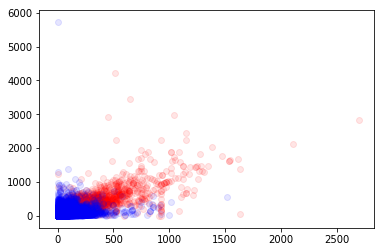

In [21]:
plt.scatter(rawData['남자20대'],rawData['여자20대'],alpha=0.1,color='r')
plt.scatter(rawData['남자10대'],rawData['여자50대'],alpha=0.1,color='b')
plt.show()